# Analiza pliku z danymi dot. pasażerów Titanica

## Wstęp
W tym notebooku przejdziemy przez zestaw danych Titanic i przewidzimy, czy osoba przeżyła katastrofę statku.

Plan działania:
1. Zdefiniowanie pytania lub problemu.
2. Pozyskanie danych treningowych i testowych.
3. Opracowanie, przygotowanie, oczyszczenie danych.
4. Analiza, identyfikacja wzorców i eksploracja danych.
5. Modelowanie, przewidywanie i rozwiązywanie problemu.
6. Wizualizacja, raportowanie i prezentacja ostatecznego rozwiązania.

Cele:
- **Klasyfikacja** i kategoryzacja danych
- **Badanie korelacji** - Można podejść do problemu na podstawie dostępnych cech w zbiorze danych treningowych. Zdecydujemy które cechy w zbiorze danych przyczyniają się znacząco do naszego celu rozwiązania. Czy statystycznie rzecz biorąc istnieje korelacja pomiędzy cechą a przeżywalnością?
- **Modelowanie** - Możliwa jest konieczność przekształcenia danych tekstowych na liczbowe.
- **Brakujące dane** - Ocenimy brakujące wartości w ramach danej cechy i podejmiemy decyzję dot. dalszego działania.
- **Korekty** - Przeanalizujemy dane pod kątem niedokładności szukając jakichkolwiek wartości odstających wśród naszych próbek. Możliwe jest wykluczenie cechy jeśli nie wnosi nic do analizy.
- **Tworzenie** - Zastanowimy się czy możemy stworzyć nowe cechy na podstawie istniejących.
- **Wizualizacja** - Dobierzemy odpowiednie wykresy do charakteru danych.

## 1. Zdefiniowanie pytania lub problemu.

- 15 kwietnia 1912 roku, podczas swojego dziewiczego rejsu, Titanic zatonął po zderzeniu z górą lodową, zabijając 1502 z 2224 pasażerów i załogi. Przekładając to na 32% wskaźnik przeżywalności.
- Jednym z powodów, dla których katastrofa statku doprowadziła do takiej utraty życia, było to, że nie było wystarczającej liczby łodzi ratunkowych dla pasażerów i załogi.
- Chociaż istniał pewien element szczęścia związany z przeżyciem zatonięcia, niektóre grupy ludzi miały większe szanse na przeżycie niż inne, takie jak kobiety, dzieci i klasa wyższa.

Pytanie badawcze: *Jakiego rodzaju ludzie mieli większe szanse na przeżycie?*

In [1]:
# analiza, obróbka i wizualizacja danych
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random as rnd

# uczenie maszynowe
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense

sns.set_style('darkgrid')

## 2. Pozyskanie danych treningowych i testowych.


In [2]:
train_df = pd.read_csv(r"data\train.csv") # dane treningowe
test_df = pd.read_csv(r"data\test.csv") # dane testowe
titanic_data = [train_df, test_df] # wszystkie dane

In [3]:
# Przegląd danych
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Dane treningowe')
train_df.info()
print('='*40)
print('Dane testowe')
test_df.info()

Dane treningowe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Dane testowe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

**Kolumny z brakami danych:**
TRAIN: Cabin, Age, Embarked (ilość danych rosnąca)
TEST: Cabin, Age (ilość danych rosnąca) 

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 3. Opracowanie, przygotowanie, oczyszczenie danych.

In [7]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Dane numeryczne: 'Age','SibSp','Parch','Fare'
_____________
Dane kategoryczne: 'Survived','Pclass','Sex','Ticket','Cabin','Embarked'
(w tym 'Cabin' (kabina), która jest alfanumeryczna)

In [8]:
# dzielenie danych na numeryczne (stosunkowe) i kategoryczne (skala porządkowa)
df_num = train_df[['Age','SibSp','Parch','Fare']] #dane numeryczne
df_kat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

Powyższy kod tworzy z train_df dwie osobne ramki danych: df_num i df_kat.

df_num zawiera tylko kolumny numeryczne z train_df: "Age", "SibSp", "Parch" i "Fare".

df_kat zawiera kolumny kategoryczne z train_df: "Survived", "Pclass", "Sex", "Ticket", "Cabin" oraz "Embarked".

## 4. Analiza, identyfikacja wzorców i eksploracja danych.

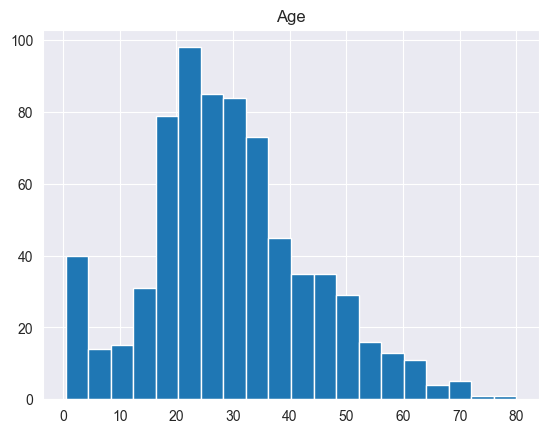

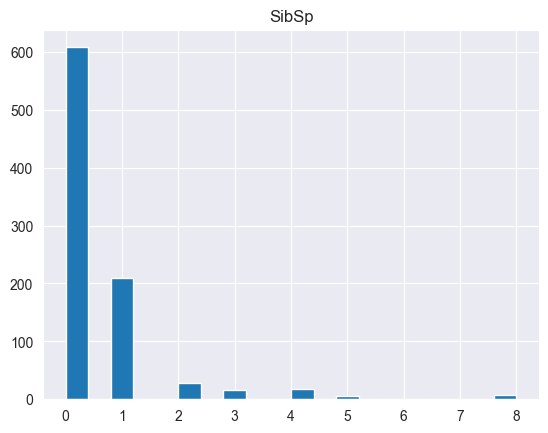

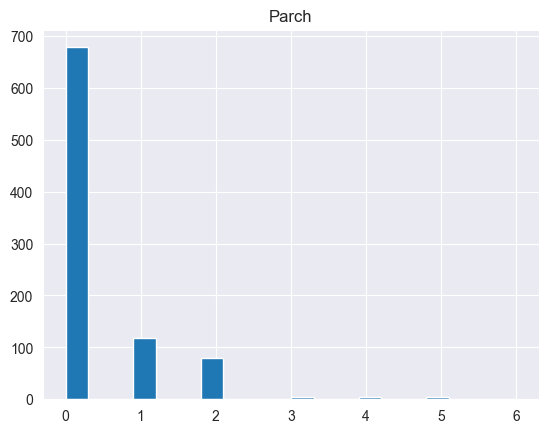

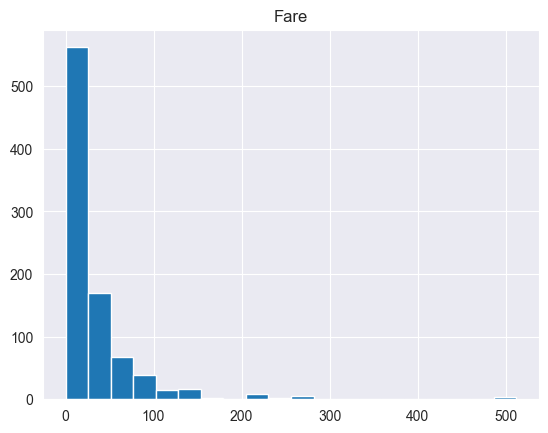

In [9]:
for i in df_num.columns:
    plt.hist(df_num[i], bins=20)
    plt.title(i)
    plt.show()

Histogramy wizualizują rozkład wartości dla każdej z kolumn liczbowych "Wiek", "SibSp", "Parch" i "Fare".

Z histogramów można wywnioskować następujące rzeczy na temat danych:

- Rozkład wartości "Age" jest prawoskośny, a większość wartości skupia się w młodszym przedziale wiekowym.
- Kolumna "SibSp" wskazuje, że większość pasażerów nie miała na pokładzie żadnego rodzeństwa lub małżonków, natomiast mniejsza liczba pasażerów miała 1-2 rodzeństwa lub małżonków.
- Kolumna "Parch" wskazuje, że większość pasażerów nie miała rodziców lub dzieci na pokładzie, podczas gdy mniejsza liczba pasażerów miała 1-3 rodziców lub dzieci.
- Rozkład wartości "Fare" jest również prawoskośny, przy czym większość wartości koncentruje się w dolnym przedziale.

<AxesSubplot: >

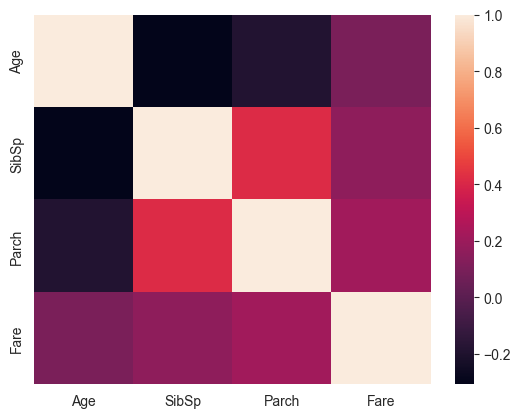

In [10]:
sns.heatmap(df_num.corr())
# Fare jest dodatnio skorelowany z SibSp i Parch
# Age i Fare są ze sobą ujemnie skorelowane
# Może być warto połączyć Parch i SibSp

Dalszy plan działania
---
Na podstawie powyższych danych należy podjąć pewne decyzje dot. dalszych działań. Uważam, że cele powinny zostać spełnione w następujący sposób:
- **Brakujące dane**
-- Wiek może być zkorelowany z przeżywalnością, warto pochylić się nad tą zmienną.
-- Analogicznie do zmiennej 'Embarked'
- **Korekty**
-- Zmienna 'Ticket' może być pominięta w analizie jako, że posiada wiele duplikatów
-- Zmiena 'Cabin' może być pominięta, ze względu na wysoki odsetek braku danych
-- Zmienna 'PassengerID' zostaje pominięta, ze względu na brak wpływu na przeżywalność
-- Zmienna 'Name' zostaje pominięta, ze względu na brak wpływu na przeżywalność
- **Tworzenie**
-- Utworzymy zmienną 'Family', która będzie sumą 'Parch' i 'SibSp'
-- Wydobędziemy tytuł (np. 'Mr', 'Mrs', 'Dr') z zmiennej 'Name'
-- Dodamy nową cechę dla zakresów wieku. Zamieni to ciągłą zmienną numeryczną na kilka kategorii.
-- Analogicznie do powyższego punktu dla zmiennej 'Fare'

In [11]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Na podstawie powyższej tabeli możemy stwierdzić, że wyższa wartość "Pclass" generalnie prowadzi do wyższego średniego wskaźnika przeżycia, co oznacza, że osoby, które podróżowały pierwszą klasą miały większą szansę na przeżycie w porównaniu do tych, którzy podróżowali niższymi klasami. Sugeruje to pozytywny związek pomiędzy "Pclass" a "Survived".

In [12]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


Zależność między cechami "Survived" i "Sex" jest taka, że pasażerki miały wyższy wskaźnik przeżycia w porównaniu z pasażerami. Można to zauważyć na podstawie danych, które pokazują, że 74% pasażerek przeżyło, podczas gdy tylko 18% pasażerów płci męskiej przeżyło. Sugeruje to, że bycie kobietą było pozytywnie skorelowane z przeżywalnością w tym zbiorze danych.

In [13]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


W powstałej tabeli widać, że pasażerowie z wyższymi wartościami "SibSp" mieli średnio niższe wskaźniki przeżycia, przy czym najwyższy wskaźnik przeżycia mieli ci, którzy mieli jedno lub dwoje rodzeństwa.

In [14]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


Z wyniku możemy zauważyć, że pasażerowie, którzy mieli na pokładzie 1-3 rodziców/dzieci mieli nieco wyższy współczynnik przeżycia w porównaniu z pasażerami, którzy nie mieli rodziców/dzieci. Nie można jednak jednoznacznie wyciągnąć konkluzję na temat korelacji między SibSp i Parch, a Survived.

In [15]:
#train_df[["Fare", "Survived"]].groupby(['Fare'], as_index=True).mean().sort_values(by='Survived', ascending=False)

#Survived
#Fare	
#512.3292	1.0
#57.9792	1.0
#13.8583	1.0
#13.7917	1.0
#13.4167	1.0

# Niewiele z takich danych można wyczytać, należy najpierw stworzyć zakresy
# Analogicznie dla Age

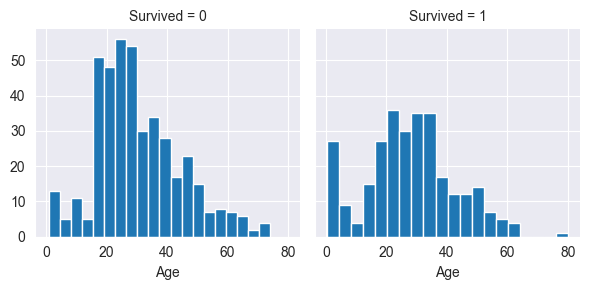

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

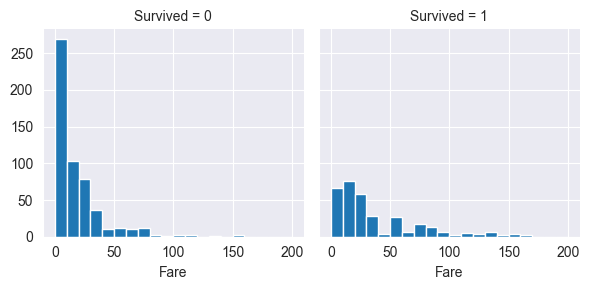

In [17]:
g = sns.FacetGrid(train_df, col='Survived')
#g.map(plt.hist, 'Fare', bins=20)
g.map(plt.hist, 'Fare', bins=20, range=[0,200])

Można zauważyć, że większość osób, które nie przeżyły, ma wartości taryfy w dolnym zakresie, natomiast wiele osób, które przeżyły, w wyższym zakresie. Może to sugerować, że pasażerowie z wyższymi taryfami mieli większe szanse na przeżycie. Można też zauważyć, że w porównaniu z innymi grupami wiekowymi większy był odsetek małych dzieci, które przeżyły. Warto będzie wziąść 'Age' i 'Fare' pod uwagę w dalszej analzie. 

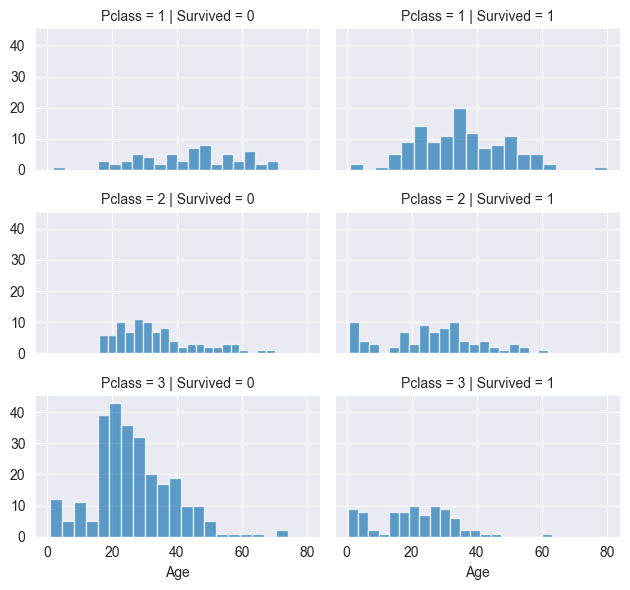

In [18]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.7, bins=20)

W przypadku klasy pierwszej i drugiej większość pasażerów, którzy przeżyli, byli młodsi, a ich wiek wahał się od 20 do 40 lat.
W przypadku klasy trzeciej większość pasażerów, którzy nie przeżyli, mieściła się w przedziale wiekowym od 20 do 40 lat, natomiast rozkład wieku tych, którzy przeżyli, jest bardziej rozłożony, przy czym niektórzy pasażerowie byli tak młodzi jak niemowlęta, a inni tak starzy jak 60+ lat.
Ogólnie rzecz biorąc, wykresy sugerują, że pasażerowie z wyższą klasą i młodsi wiekiem mogli mieć większe szanse na przeżycie.

In [19]:
train_df.groupby(['Pclass']).mean(numeric_only=True)['Age']
# Im niższa klasa tym młodsi pasażerowie

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

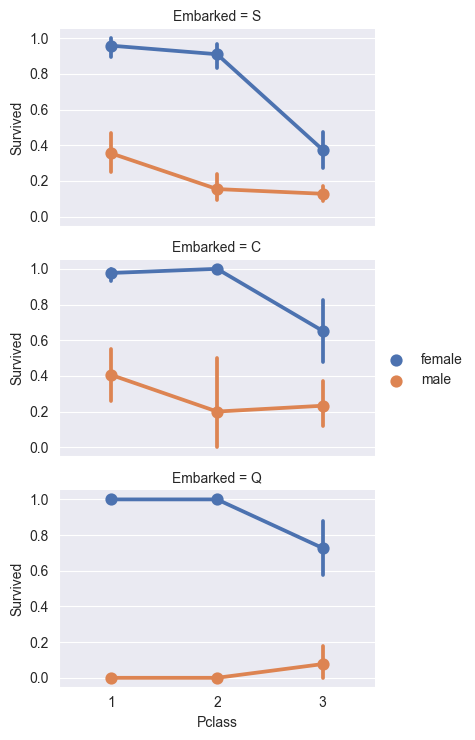

In [20]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.5, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=[1, 2, 3], hue_order=['female', 'male'])
grid.add_legend()

Wizualizacja sugeruje, że osoby, które zapłaciły wyższe opłaty, miały większe szanse na przeżycie, zwłaszcza wśród kobiet. Pokazuje również, że osoby, które wsiadły na statek z portu "C" miały trochę wyższy wskaźnik przeżycia w porównaniu do osób, które wsiadły z portów "Q" i "S".

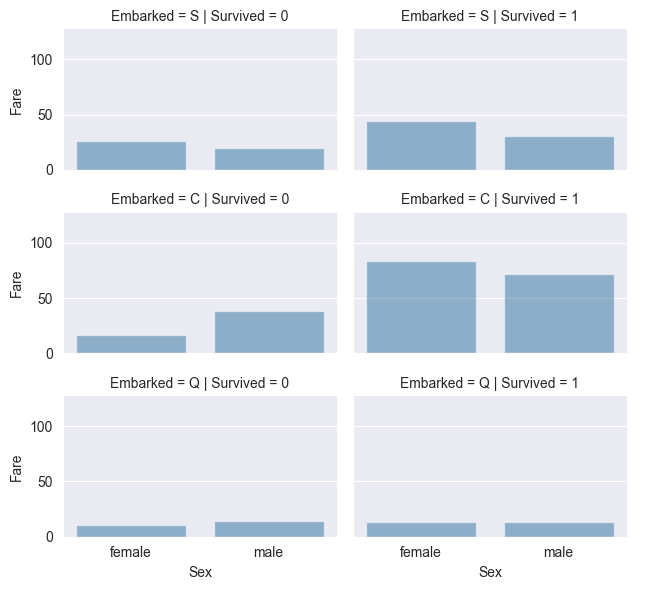

In [21]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', row_order=['S','C','Q'], col_order=[0,1], height=2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errwidth=0, order=['female', 'male'])
grid.add_legend()

Pasażerowie, którzy weszli na pokład z portu "Q" mieli najniższą taryfę i najniższy wskaźnik przeżywalności. Obie zmienne weźmiemy pod uwagę przy dalszej analizie.

#### Usuwanie cech

Aby dostosować się do naszych założeń i decyzji, usuniemy cechy Cabin i Ticket.

In [22]:
print("Before", train_df.shape, test_df.shape, titanic_data[0].shape, titanic_data[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
titanic_data = [train_df, test_df]

print("After", train_df.shape, test_df.shape, titanic_data[0].shape, titanic_data[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


#### Tworzenie nowej cechy poprzez wyodrębnianie z istniejącej

Chcemy przeanalizować, czy cecha Name może być wykorzystana do wyodrębnienia tytułów i przetestować korelację pomiędzy tytułami a przeżywalnością, przed porzuceniem cech Name i PassengerId.

W poniższym kodzie wyodrębniamy cechę Title używając wyrażeń regularnych. RegEx (\w+\.) dopasowuje pierwsze słowo, które kończy się znakiem kropki w zmiennej Name. Flaga expand=False zwraca DataFrame.

In [23]:
for data in titanic_data:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
for data in titanic_data:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Title', ascending=False)

,Title,Survived
4,Rare,0.347826
3,Mrs,0.793651
2,Mr,0.156673
1,Miss,0.702703
0,Master,0.575000


Ten kod modyfikuje cechę Title w titanic_data poprzez zastąpienie kilku rzadkich tytułów etykietą "Rare". W ten sposób upraszczamy cechę poprzez zgrupowanie tych mniej popularnych tytułów w jedną kategorię. Następnie obliczamy średni wskaźnik przeżywalności pasażerów dla każdego tytułu.

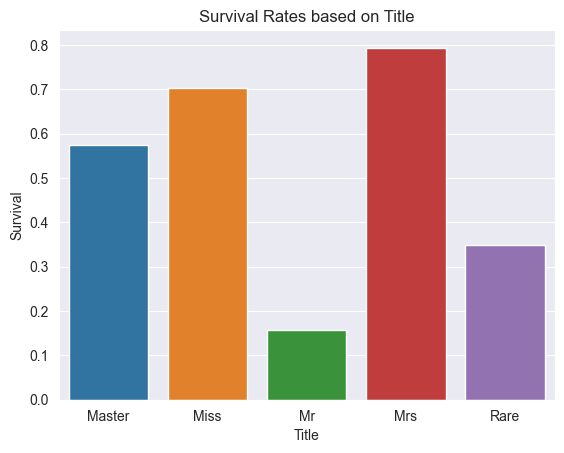

In [25]:
title_survived = train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
sns.barplot(x='Title', y='Survived', data=title_survived)
plt.ylabel("Survival")
plt.xlabel("Title")
plt.title("Survival Rates based on Title")
plt.show()

Wykres pokazuje zależność między współczynnikiem przeżycia, a tytułem pasażerów. Okazuje się, że pasażerki z tytułem "Mrs" mieli najwyższy współczynnik przeżycia spośród wszystkich tytułów. Pasażerowie z tytułami "Miss" i "Master" również mieli stosunkowo wyższy współczynnik przeżycia w porównaniu z innymi tytułami. Pasażerowie z tytułami "Mr" i "Rare" mieli najniższe wskaźniki przeżywalności. Sugeruje to, że tytuł pasażera może być istotnym czynnikiem w przewidywaniu przeżywalności danego pasażera.

Przekształcamy cechę "Title" z kategorycznej w numeryczną

In [26]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in titanic_data:
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Możemy teraz usunąć cechy PassengerId i Name z train_df.

In [27]:
#train_df.shape, test_df.shape
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
titanic_data = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

#### Konwertowanie cechy kategorycznej w numeryczną

Konwersja cechy kategorycznej oznacza przekształcenie cechy kategorycznej w postać numeryczną. Jest to konieczne dla niektórych algorytmów uczenia maszynowego, ponieważ są one zaprojektowane do pracy z danymi numerycznymi, a nie kategorycznymi.

In [28]:
for data in titanic_data:
    data['Sex'].fillna('unknown', inplace=True)
    data['Sex'] = data['Sex'].map({'female': 1, 'male': 0, 'unknown': -1}).astype(int)

train_df['Sex'] = titanic_data[0]['Sex']
test_df['Sex'] = titanic_data[1]['Sex']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


#### Uzupełnianie cechy numerycznej

Uzupełnianie numerycznej cechy ciągłej odnosi się do procesu wypełniania brakujących lub niekompletnych wartości w numerycznej funkcji ciągłej lub kolumnie. Ten krok jest ważny, ponieważ wiele algorytmów uczenia maszynowego wymaga kompletnych i nie brakujących danych, aby wykonać dokładne predykcje. Aby uzupełnić numeryczną cechę ciągłą, można zastosować różne metody, takie jak imputacja średnia, imputacja mediana i imputacja regresji. Celem jest zastąpienie brakujących wartości szacunkami, które są jak najbardziej zbliżone do wartości prawdziwych.

Relatywnie precyzyjną metodą szacowania brakujących wartości jest uwzględnienie innych skorelowanych cech. W naszym przypadku, korelacja pomiędzy wiekiem, płcią i klasą pasażerów może być użyta do oszacowania brakujących wartości wieku. Dokonuje się tego poprzez obliczenie mediany wieku dla każdej kombinacji klasy pasażera i płci. Na przykład, mediana wieku dla pasażerów z Pclass 1, którzy są mężczyznami, pasażerek z Pclass 1, etc..

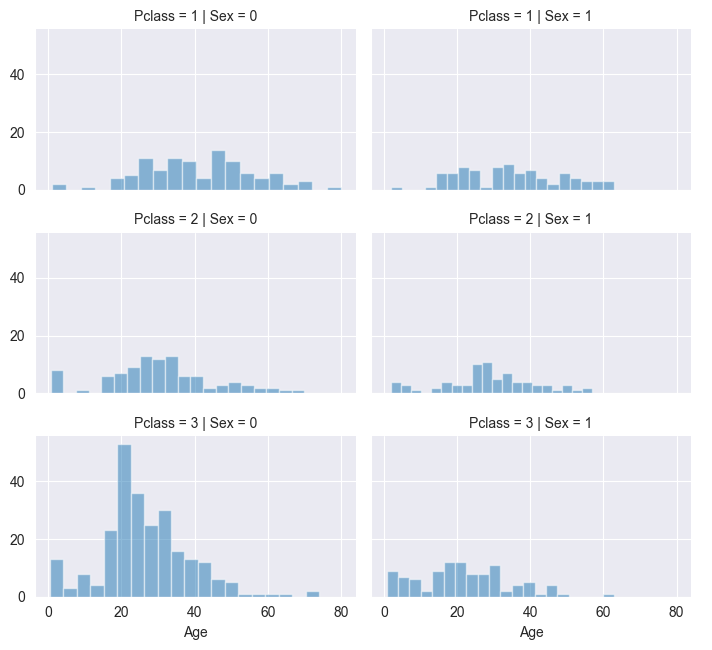

In [29]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [30]:
medians = train_df.groupby(['Pclass', 'Sex'])['Age'].median()
medians

Pclass  Sex
1       0      40.0
        1      35.0
2       0      30.0
        1      28.0
3       0      25.0
        1      21.5
Name: Age, dtype: float64

In [31]:
train_df['Age'].count()

714

In [32]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return medians[row['Pclass'], row['Sex']]
    return row['Age']

train_df['Age'] = train_df.apply(fill_age, axis=1)

Najpierw obliczamy medianę wieku dla każdej kombinacji klasy pasażera (Pclass) i płci (Sex) używając metody groupby na ramce danych "train_df". Następnie tworzymy funkcję "fill_age", która wypełnia brakujące wartości w kolumnie "Age" na podstawie klasy pasażera i płci. Funkcja zwraca medianę wieku dla danej kombinacji Pclass i Sex, jeśli brakuje wartości "Age". Jeśli nie brakuje wartości "Wiek", funkcja zwraca oryginalną wartość "Wiek". Na koniec kod stosuje funkcję "fill_age" do ramki danych "train_df" wzdłuż osi rzędów (axis=1), aby wypełnić wszystkie brakujące wartości w kolumnie "Age".

Sprawdzamy czy wartości zostały uzupełnione (oczekujemy 891):

In [33]:
train_df['Age'].count()

891

In [34]:
train_df.describe()
# Wszystkie brakujące dane uzupełnione

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.112424,0.523008,0.381594,32.204208,1.728395
std,0.486592,0.836071,0.477990,13.304424,1.102743,0.806057,49.693429,1.030039
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,21.500000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,5.000000


Tworzymy zakresy wieku:

In [35]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 8)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 10.368]",0.593750
1,"(10.368, 20.315]",0.382609
2,"(20.315, 30.263]",0.323607
3,"(30.263, 40.21]",0.448649
4,"(40.21, 50.158]",0.383721
5,"(50.158, 60.105]",0.404762
6,"(60.105, 70.052]",0.235294
7,"(70.052, 80.0]",0.200000


In [36]:
train_df['AgeBand'] = train_df['AgeBand'].cat.codes
train_df['AgeBand'] = train_df['AgeBand'].astype(int)

test_df['AgeBand'] = pd.cut(test_df['Age'], 8)
test_df['AgeBand'] = test_df['AgeBand'].cat.codes
test_df['AgeBand'] = test_df['AgeBand'].astype(int)

In [37]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22.0,1,0,7.2500,S,1,2
1,1,1,1,38.0,1,0,71.2833,C,3,3
2,1,3,1,26.0,0,0,7.9250,S,2,2
3,1,1,1,35.0,1,0,53.1000,S,3,3
4,0,3,0,35.0,0,0,8.0500,S,1,3


#### Tworzenie nowej cechy z istniejących

In [38]:
for data in titanic_data:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Tworzy nową cechę "FamilySize" w danych "titanic_data" poprzez dodanie wartości cech "SibSp" i "Parch" oraz dodanie 1 (samotny pasażer => FamilySize=1). Powstała w ten sposób cecha reprezentuje liczbę członków rodziny, w tym osobę, którą jest dany pasażer.

In [39]:
for data in titanic_data:
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,S,1,2,2,0
1,1,1,1,38.0,1,0,71.2833,C,3,3,2,0
2,1,3,1,26.0,0,0,7.9250,S,2,2,1,1
3,1,1,1,35.0,1,0,53.1000,S,3,3,2,0
4,0,3,0,35.0,0,0,8.0500,S,1,3,1,1


IsAlone tworzy binarną klasyfikację tego, czy pasażer podróżował sam czy nie, na podstawie kolumny "FamilySize".

Zrezygnujmy z funkcji Parch, SibSp i FamilySize na rzecz IsAlone.

In [40]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
titanic_data = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,0,22.0,7.2500,S,1,2,0
1,1,1,1,38.0,71.2833,C,3,3,0
2,1,3,1,26.0,7.9250,S,2,2,1
3,1,1,1,35.0,53.1000,S,3,3,0
4,0,3,0,35.0,8.0500,S,1,3,1


Dodatkowo, utworzymy arbitralną cechę 'AgeClass', która jest iloczynem wieku i klasy.

In [41]:
for data in titanic_data:
    data['AgeClass'] = data['AgeBand'] * data['Pclass']

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone,AgeClass
0,0,3,0,22.0,7.2500,S,1,2,0,6
1,1,1,1,38.0,71.2833,C,3,3,0,3
2,1,3,1,26.0,7.9250,S,2,2,1,6
3,1,1,1,35.0,53.1000,S,3,3,0,3
4,0,3,0,35.0,8.0500,S,1,3,1,9


Możemy usunąć kolumnę Age.

In [42]:
train_df = train_df.drop(columns=['Age'])
test_df = test_df.drop(columns=['Age'])

In [43]:
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,AgeBand,IsAlone,AgeClass
0,0,3,0,7.2500,S,1,2,0,6
1,1,1,1,71.2833,C,3,3,0,3
2,1,3,1,7.9250,S,2,2,1,6
3,1,1,1,53.1000,S,3,3,0,3
4,0,3,0,8.0500,S,1,3,1,9


In [44]:
train_df.describe(include=['O'])
# W naszej ostatniej zmiennej kategorycznej brakuje nam dwóch wystąpień

,Embarked
count,889
unique,3
top,S
freq,644


In [45]:
# Zastąpimy brakujące dane najczęstszym wystąpieniem (top = S)
for data in titanic_data:
    data['Embarked'].fillna('S', inplace=True)

In [46]:
train_df.describe(include=['O'])

,Embarked
count,889
unique,3
top,S
freq,644


In [47]:
# Zamienimy dane kategoryczne Embarked w dane numeryczne
for data in titanic_data:
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df['Embarked'] = titanic_data[0]['Embarked']
test_df['Embarked'] = titanic_data[1]['Embarked']
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,AgeBand,IsAlone,AgeClass
0,0,3,0,7.2500,0,1,2,0,6
1,1,1,1,71.2833,1,3,3,0,3
2,1,3,1,7.9250,0,2,2,1,6
3,1,1,1,53.1000,0,3,3,0,3
4,0,3,0,8.0500,0,1,3,1,9


In [48]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 5)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [49]:
train_df['FareBand'] = train_df['FareBand'].cat.codes
train_df['FareBand'] = train_df['FareBand'].astype(int)

test_df['FareBand'] = pd.cut(test_df['Fare'], 8)
test_df['FareBand'] = test_df['FareBand'].cat.codes
test_df['FareBand'] = test_df['FareBand'].astype(int)

In [50]:
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,AgeBand,IsAlone,AgeClass,FareBand
0,0,3,0,7.2500,0,1,2,0,6,0
1,1,1,1,71.2833,1,3,3,0,3,4
2,1,3,1,7.9250,0,2,2,1,6,1
3,1,1,1,53.1000,0,3,3,0,3,4
4,0,3,0,8.0500,0,1,3,1,9,1


Następnie możemy usunąć kolumnę 'Fare'

In [51]:
train_df = train_df.drop(columns=['Fare'])
test_df = test_df.drop(columns=['Fare'])

### Finalny zbiór danych:

In [52]:
train_df.head()

,Survived,Pclass,Sex,Embarked,Title,AgeBand,IsAlone,AgeClass,FareBand
0,0,3,0,0,1,2,0,6,0
1,1,1,1,1,3,3,0,3,4
2,1,3,1,0,2,2,1,6,1
3,1,1,1,0,3,3,0,3,4
4,0,3,0,0,1,3,1,9,1


## 5. Modelowanie, przewidywanie i rozwiązywanie problemu.

Jesteśmy teraz gotowi do trenowania modelu uczenia maszynowego, aby uzyskać rozwiązanie. Nasz problem obejmuje zarówno klasyfikację, jak i regresję. Chcemy zidentyfikować związek między wyjściem (Survived = 0/1), a innymi zmiennymi lub cechami (Płeć, Wiek, Port itp.). Do danego zbioru danych, należy zastosować uczenie nadzorowane. Biorąc to pod uwagę, możemy zawęzić wybór modeli do kilku, w tym:
- Decision Tree (Drzewo decyzyjne)
- Artificial neural network (Sztuczna sieć neuronowa)
- Logistic Regression (Regresja logistyczna)

- Random Forest
- Support Vector Machines
- Naive Bayes classifier
- k-Nearest Neighbors (KNN)
- Perceptron
- Relevance Vector Machine (RVM)

W tej analizie sprawdzimy pierwsze trzy modele. Pozostałe mogą być sprawdzone przez użytkownika w pliku main.py

In [53]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

#### Drzewo decyzyjne:

In [54]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 4)
acc_decision_tree

88.2155

Model drzewa decyzyjnego, jest popularnym algorytmem dla problemów klasyfikacyjnych. Model został wytrenowany na danych treningowych (X_train, Y_train), a dokładność modelu na danych treningowych wynosi 88,2155%. Dokładność modelu na danych treningowych jest dobrym wskaźnikiem tego, jak dobrze model będzie działał na danych spoza zbioru treningowego.

#### Sieć neuronowa:
Tworzymy prostą sieć neuronową typu feedforward z dwiema warstwami ukrytymi i sigmoidalną funkcją aktywacji w warstwie wyjściowej, ponieważ problem wymaga klasyfikacji binarnej. Model jest kompilowany przy użyciu binarnej straty entropii krzyżowej oraz algorytmu optymalizacji Adam i jest trenowany przez 500 epok przy wielkości partii 10.

In [55]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [56]:
model = keras.Sequential() # inicjalizacja
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1])) # pierwsza ukryta wartwa
model.add(Dense(units=32, activation='relu')) # druga ukryta warstwa
model.add(Dense(units=1, activation='sigmoid')) # warstwa wyjściowa z sigmoidalną funkcją aktywacji
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # kompilacja modelu

In [57]:
model.fit(X_train, Y_train, epochs=500, batch_size=10) # trening

Epoch 1/1000
90/90 [==============================] - 1s 1ms/step - loss: 0.5763 - accuracy: 0.7116
Epoch 2/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.7688
Epoch 3/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7991
Epoch 4/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.8058
Epoch 5/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8092
Epoch 6/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.8126
Epoch 7/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8137
Epoch 8/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8171
Epoch 9/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8204
Epoch 10/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8238

90/90 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8451
Epoch 82/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8496
Epoch 83/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8474
Epoch 84/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8462
Epoch 85/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8462
Epoch 86/1000
90/90 [==============================] - 0s 964us/step - loss: 0.3594 - accuracy: 0.8462
Epoch 87/1000
90/90 [==============================] - 0s 964us/step - loss: 0.3558 - accuracy: 0.8406
Epoch 88/1000
90/90 [==============================] - 0s 953us/step - loss: 0.3617 - accuracy: 0.8462
Epoch 89/1000
90/90 [==============================] - 0s 975us/step - loss: 0.3582 - accuracy: 0.8519
Epoch 90/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8

90/90 [==============================] - 0s 964us/step - loss: 0.3300 - accuracy: 0.8608
Epoch 162/1000
90/90 [==============================] - 0s 997us/step - loss: 0.3388 - accuracy: 0.8642
Epoch 163/1000
90/90 [==============================] - 0s 975us/step - loss: 0.3224 - accuracy: 0.8653
Epoch 164/1000
90/90 [==============================] - 0s 953us/step - loss: 0.3321 - accuracy: 0.8597
Epoch 165/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8575
Epoch 166/1000
90/90 [==============================] - 0s 952us/step - loss: 0.3275 - accuracy: 0.8597
Epoch 167/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8597
Epoch 168/1000
90/90 [==============================] - 0s 964us/step - loss: 0.3264 - accuracy: 0.8620
Epoch 169/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.8541
Epoch 170/1000
90/90 [==============================] - 0s 941us/step - loss: 0.3236 

90/90 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8631
Epoch 241/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8541
Epoch 242/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3161 - accuracy: 0.8653
Epoch 243/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3101 - accuracy: 0.8709
Epoch 244/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.8653
Epoch 245/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8721
Epoch 246/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8642
Epoch 247/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8664
Epoch 248/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8687
Epoch 249/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.

90/90 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8743
Epoch 321/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3028 - accuracy: 0.8620
Epoch 322/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2983 - accuracy: 0.8631
Epoch 323/1000
90/90 [==============================] - 0s 979us/step - loss: 0.3045 - accuracy: 0.8698
Epoch 324/1000
90/90 [==============================] - 0s 975us/step - loss: 0.3009 - accuracy: 0.8653
Epoch 325/1000
90/90 [==============================] - 0s 997us/step - loss: 0.2991 - accuracy: 0.8743
Epoch 326/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3008 - accuracy: 0.8664
Epoch 327/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8664
Epoch 328/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8765
Epoch 329/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3019 - accura

90/90 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8698
Epoch 401/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.8631
Epoch 402/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2962 - accuracy: 0.8653
Epoch 403/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8642
Epoch 404/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.8642
Epoch 405/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.8743
Epoch 406/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.8676
Epoch 407/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2938 - accuracy: 0.8721
Epoch 408/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2931 - accuracy: 0.8709
Epoch 409/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2944 - accuracy: 0.

90/90 [==============================] - 0s 1ms/step - loss: 0.2939 - accuracy: 0.8732
Epoch 481/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.8698
Epoch 482/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2940 - accuracy: 0.8642
Epoch 483/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.3012 - accuracy: 0.8709
Epoch 484/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.8676
Epoch 485/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.8698
Epoch 486/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.8743
Epoch 487/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.8765
Epoch 488/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2892 - accuracy: 0.8721
Epoch 489/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2888 - accuracy: 0.

90/90 [==============================] - 0s 1ms/step - loss: 0.2940 - accuracy: 0.8687
Epoch 561/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2874 - accuracy: 0.8732
Epoch 562/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.8653
Epoch 563/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.8620
Epoch 564/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.8709
Epoch 565/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.8653
Epoch 566/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2876 - accuracy: 0.8664
Epoch 567/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.8777
Epoch 568/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2869 - accuracy: 0.8687
Epoch 569/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2872 - accuracy: 0.

90/90 [==============================] - 0s 997us/step - loss: 0.2819 - accuracy: 0.8743
Epoch 641/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2870 - accuracy: 0.8709
Epoch 642/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.8743
Epoch 643/1000
90/90 [==============================] - 0s 975us/step - loss: 0.2828 - accuracy: 0.8743
Epoch 644/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.8664
Epoch 645/1000
90/90 [==============================] - 0s 992us/step - loss: 0.2869 - accuracy: 0.8754
Epoch 646/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.8754
Epoch 647/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.8721
Epoch 648/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.8620
Epoch 649/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2893 - accura

90/90 [==============================] - 0s 1ms/step - loss: 0.2835 - accuracy: 0.8721
Epoch 721/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.8777
Epoch 722/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2840 - accuracy: 0.8743
Epoch 723/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2916 - accuracy: 0.8709
Epoch 724/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.8788
Epoch 725/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2871 - accuracy: 0.8754
Epoch 726/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2845 - accuracy: 0.8777
Epoch 727/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.8799
Epoch 728/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2854 - accuracy: 0.8765
Epoch 729/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.

90/90 [==============================] - 0s 1ms/step - loss: 0.2832 - accuracy: 0.8754
Epoch 801/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2909 - accuracy: 0.8642
Epoch 802/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.8799
Epoch 803/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.8754
Epoch 804/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.8709
Epoch 805/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2819 - accuracy: 0.8788
Epoch 806/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.8777
Epoch 807/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.8743
Epoch 808/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.8754
Epoch 809/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.

90/90 [==============================] - 0s 1ms/step - loss: 0.2805 - accuracy: 0.8777
Epoch 881/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.8788
Epoch 882/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8732
Epoch 883/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.8732
Epoch 884/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2805 - accuracy: 0.8721
Epoch 885/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2804 - accuracy: 0.8732
Epoch 886/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.8698
Epoch 887/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.8664
Epoch 888/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2873 - accuracy: 0.8788
Epoch 889/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2805 - accuracy: 0.

90/90 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.8687
Epoch 961/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8788
Epoch 962/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8664
Epoch 963/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.8799
Epoch 964/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.8743
Epoch 965/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8642
Epoch 966/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2808 - accuracy: 0.8732
Epoch 967/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.8822
Epoch 968/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.8765
Epoch 969/1000
90/90 [==============================] - 0s 1ms/step - loss: 0.2746 - accuracy: 0.

In [58]:
score = model.evaluate(X_train, Y_train, verbose=0) # ewaluacja modelu
print("Training Accuracy: ", round(score[1]*100, 4))

Training Accuracy:  88.1033


Dokładność 87.991% wskazuje, że model ten dobrze radzi sobie z klasyfikowaniem pasażerów jako tych, którzy przeżyli lub nie, w oparciu o cechy zawarte w danych treningowych. Dalsza ocena i analiza może jeszcze bardziej poprawić wynik.

In [59]:
Y_pred = model.predict(X_test) # predykcje88.1033

14/14 [==============================] - 0s 997us/step


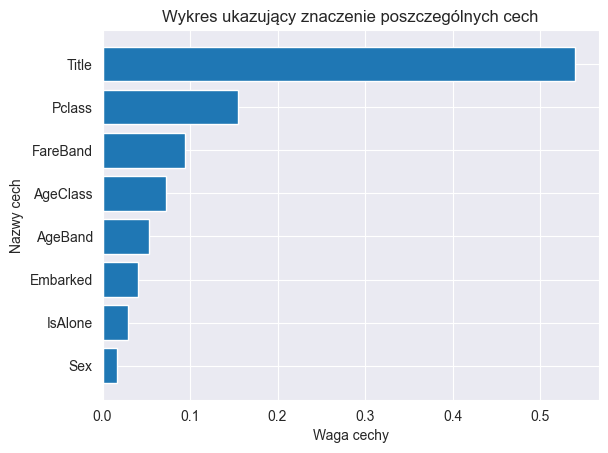

In [69]:
importances = decision_tree.feature_importances_
importance_index = np.argsort(importances)

names = [X_train.columns[i] for i in importance_index]

plt.barh(range(X_train.shape[1]), importances[importance_index])
plt.yticks(range(X_train.shape[1]), names)
plt.title("Wykres ukazujący znaczenie poszczególnych cech")
plt.xlabel("Waga cechy")
plt.ylabel("Nazwy cech")
plt.show()

#### Regresja logistyczna 

In [61]:
train_df = train_df[:418]
Y_train = train_df["Survived"]
X_train = train_df.drop("Survived", axis=1)

X_train.shape, Y_train.shape, X_test.shape

((418, 8), (418,), (418, 8))

In [62]:
logreg = LogisticRegression()

In [63]:
logreg.fit(X_train, Y_train)

LogisticRegression()

In [75]:
Y_pred = logreg.predict(X_test)

In [76]:
round(accuracy_score(Y_train, Y_pred)*100,4)

47.8469

Model został wytrenowany na zbiorze danych szkoleniowych, który zawierał 891 wierszy danych. Po dopasowaniu modelu regresji logistycznej do danych treningowych, został on następnie użyty do przewidywania na testowym zbiorze danych, który zawierał 418 wierszy.

Dokładność modelu wyniosła 0,4784, co oznacza, że model poprawnie przewidział wynik (przeżył lub nie) dla około 47,84% pasażerów w danych testowych. Jest to stosunkowo niska dokładność (szcególnie biorąc pod uwagę wyniki pozostałych modeli), wskazująca, że ten model regresji logistycznej nie radzi sobie dobrze na tym zbiorze danych. Istnieją różne powody, dla których tak może być, np. duża liczba brakujących wartości. Aby poprawić dokładność modelu, konieczna może być dalsza analiza i inżynieria cech.

## 6.  Wizualizacja, raportowanie i prezentacja ostatecznego rozwiązania.
Porównanie użytych modeli:

In [66]:
wyniki = {'Wynik': [88.2155, 87.991, 47.8469]}
pd.DataFrame(wyniki, index=["Drzewo decyzyjne", "Sieć neuronowa", "Regresja logistyczna"])

,Wynik
Drzewo decyzyjne,88.2155
Sieć neuronowa,87.9910
Regresja logistyczna,47.8469


W oparciu o wyniki dokładności, modele drzewa decyzyjnego i sieci neuronowej wypadły podobnie dobrze z wynikiem dokładności około 88%. Jednak model regresji logistycznej wypadł znacznie gorzej z wynikiem dokładności wynoszącym tylko 47,8469%. Sugeruje to, że modele drzewa decyzyjnego i sieci neuronowej są lepiej dostosowane do tego problemu klasyfikacji niż regresja logistyczna.

Ważne jest, aby zauważyć, że dokładność nie zawsze jest najlepszą metryką do oceny modeli i byłoby mądrze rozważyć inne metryki, takie jak wynik F1 i confusion matrix, aby mieć bardziej wszechstronną ocenę modeli. Dodatkowo, może być użyteczne przeprowadzenie walidacji krzyżowej, aby złagodzić przetrenowanie i uzyskać bardziej dokładną ocenę wydajności modeli na nieznanych danych.

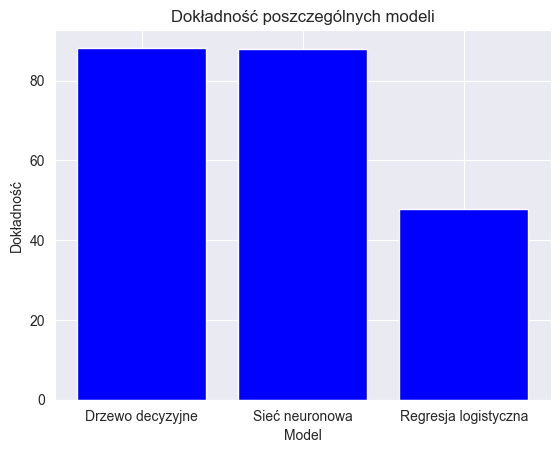

In [67]:
models = ['Drzewo decyzyjne', 'Sieć neuronowa', 'Regresja logistyczna']
accuracies = [88.2155, 87.991, 47.8469]

plt.bar(models, accuracies, color='blue')

plt.title('Dokładność poszczególnych modeli')
plt.xlabel('Model')
plt.ylabel('Dokładność')

plt.show()

# Pozostałe modele są dostępne do przetestowania w pliku main.py.

## Mikołaj Szpakowski 27782, Pierwszy rok Data Science